In [5]:
import sys
sys.path.append('../../')
from Model import *
import copy
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
BaseM = Model(Da=0.1, Dp=0.1, konA=0.1, koffA=0.01, konP=0.1, koffP=0.0101, kAP=0.001, kPA=0.001,
              eAP=2, ePA=2, xsteps=100, Tmax=10000, deltax=0.5, psi=0.1, pA=1, pP=1)

### ASI plot

In [7]:
kant = 10 ** -2
kant = 0.005
kon = 10 ** -1
log_koff = [-2.2, -1.9, -1.75]

solns = []
for lk in log_koff:
    print(lk)
    m = copy.deepcopy(BaseM)
    m.koffP = (10 ** lk) * 1.01
    m.koffA = 10 ** lk
    m.konA = kon
    m.konP = kon
    m.kAP = kant
    m.kPA = kant
    m.Tmax = 10000
    
    m.initiate()
    m.run()
    solns.append(m.X)

-2.2
-1.9
-1.75


<IPython.core.display.Javascript object>


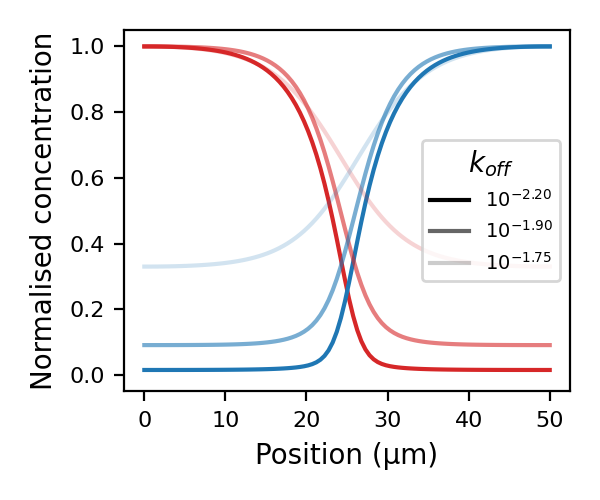

In [9]:
fig, ax = plt.subplots()
x = np.linspace(0, 50, 100)
for s, a, le in zip(solns, [1, 0.6, 0.2], log_koff):
    ax.plot(x, s[0] / max(s[0]), alpha=a, c='tab:red')
    ax.plot(x, s[1] / max(s[1]), alpha=a, c='tab:blue')
    ax.plot(0, 0, c='k', alpha=a, label=r'$10^{%.2f}$' % (le))

ax.legend(fontsize=7, title=r'$k_{off}$')
ax.set_xlabel('Position (µm)')
ax.set_ylabel('Normalised concentration')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(3, 2.5)
fig.tight_layout()
fig.savefig('Figs/simulations_asi.png', dpi=600, transparent=True)

### Dosage imbalances

In [ ]:
kant = 0.005
kon = 10 ** -1
dosages = [0.2, 0.4, 0.6, 0.8, 1]

def rundown(koff):
    solns = []
    for d in dosages:
        print(d)
        m = copy.deepcopy(BaseM)
        m.koffP = koff * 1.01
        m.koffA = koff
        m.konA = kon
        m.konP = kon
        m.kAP = kant
        m.kPA = kant
        m.pP = d

        m.initiate()
        m.run()
        solns.append(m.X)
    
    return solns

#### Low off rate

In [ ]:
solns2 = rundown(10 ** -3)

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 50, 100)
for s, a, d in zip(solns2[::-1], [1, 0.8, 0.6, 0.4, 0.2], dosages[::-1]):
    ax.plot(x, s[0], alpha=a, c='tab:red')
    ax.plot(x, s[1], alpha=a, c='tab:blue')
    ax.plot(0, 0, c='k', alpha=a, label=d)

ax.legend(fontsize=7, title=r'$P_{tot}$')
ax.set_xlabel('Position (µm)')
ax.set_ylabel('Concentration')
ax.tick_params(axis='both', labelsize=8)
ax.set_title('Low off rate\n' + r'$(k_{off} = 0.001)$', fontsize=9)
fig.set_size_inches(3, 2.5)
fig.tight_layout()
fig.savefig('Figs/simulations_imbalance_low_koff.png', dpi=600, transparent=True)

#### High off rate

In [ ]:
solns3 = rundown(10 ** -2)

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 50, 100)
for s, a, d in zip(solns3[::-1], [1, 0.8, 0.6, 0.4, 0.2], dosages[::-1]):
    ax.plot(x, s[0], alpha=a, c='tab:red')
    ax.plot(x, s[1], alpha=a, c='tab:blue')
    ax.plot(0, 0, c='k', alpha=a, label=d)

ax.legend(fontsize=7, title=r'$P_{tot}$')
ax.set_xlabel('Position (µm)')
ax.set_ylabel('Concentration')
ax.tick_params(axis='both', labelsize=8)
ax.set_title('High off rate\n' + r'$(k_{off} = 0.01)$', fontsize=9)
fig.set_size_inches(3,2.5)
fig.tight_layout()
fig.savefig('Figs/simulations_imbalance_high_koff.png', dpi=600, transparent=True)

### Symmetry breaking - induced

In [ ]:
def create_fig(solns, times, fig_times, alphas, ymax=20):
    fig, ax = plt.subplots()
    x = np.linspace(0, 50, 100)
    for t, a in zip(fig_times, alphas):
        tpoint = np.argmin(abs(times - t))
        for soln, c in zip(solns, ['tab:red', 'dodgerblue']):
            ax.plot(x, soln[tpoint], c=c, alpha=a)
    ax.set_xlabel('Position (µm)')
    ax.set_ylabel('Concentration')
    ax.set_ylim(top=ymax)
    ax.tick_params(axis='both', labelsize=8)        
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()
    return fig, ax

In [ ]:
log_kant = -3
kon = 0.1
log_koff = -2.5

m = copy.deepcopy(BaseM)
m.koffP = (10 ** log_koff) * 1.01
m.koffA = 10 ** log_koff
m.konA = kon
m.konP = kon
m.kAP = 10 ** log_kant
m.kPA = 10 ** log_kant
m.Tmax = 2000

m.initiate()
_, _, solns4, times4 = m.run()

In [ ]:
fig_times = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
alphas = np.linspace(0.1, 1, len(fig_times))

fig, ax = create_fig(solns4, times4, fig_times=fig_times, alphas=alphas, ymax=16)
ax.set_title('Induced polarity', fontsize=9)
fig.subplots_adjust(top=0.7)
fig.savefig('Figs/symmetry_breaking_induced.png', dpi=600, transparent=True)

### Symmetry breaking - spontaneous

In [ ]:
log_kant = -3
kon = 0.1
log_koff = -2.5

m = copy.deepcopy(BaseM)
m.koffP = (10 ** log_koff) * 1.01
m.koffA = 10 ** log_koff
m.konA = kon
m.konP = kon
m.kAP = 10 ** log_kant
m.kPA = 10 ** log_kant
m.Tmax = 2000

m.initiate2()
m.run()
_, _, solns5, times5 = m.run()

In [ ]:
fig_times = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
alphas = np.linspace(0.1, 1, len(fig_times))

fig, ax = create_fig(solns5, times5, fig_times=fig_times, alphas=alphas, ymax=16)
ax.set_title('Spontaneous polarity', fontsize=9)
fig.subplots_adjust(top=0.7)
ax.set_ylabel('')
ax.set_yticklabels([''] * 4)
fig.savefig('Figs/symmetry_breaking_spontaneous.png', dpi=600, transparent=True)

### Symmetry breaking - cbar

In [ ]:
import matplotlib
from matplotlib.colors import ListedColormap

colours = {0: 'tab:red', 1: 'tab:red'}
cmap = matplotlib.colors.ListedColormap(list(colours.values()), N=100)
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0.1, 1, cmap.N)
BG = np.asarray([1., 1., 1.,])
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
my_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots(figsize=(1, 2))
fig.subplots_adjust(right=0.4, left=0.25)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=my_cmap, ticks=np.linspace(0, 1, len(fig_times)))
cbar.ax.set_yticklabels([None] * len(fig_times))
cbar.ax.set_title('A', fontsize=10)
fig.savefig('Figs/symmetry_breaking_cbar_a.png', dpi=600, transparent=True)

In [ ]:
colours = {0: 'dodgerblue', 1: 'dodgerblue'}
cmap = matplotlib.colors.ListedColormap(list(colours.values()), N=100)
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0.1, 1, cmap.N)
BG = np.asarray([1., 1., 1.,])
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
my_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots(figsize=(1, 2))
fig.subplots_adjust(right=0.4, left=0.25)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=my_cmap, ticks=np.linspace(0, 1, len(fig_times)))
cbar.ax.set_yticklabels(fig_times)
cbar.ax.tick_params(labelsize=6)
ax.set_ylabel('Time (s)', labelpad=5, fontsize=10)
cbar.ax.set_title('P', fontsize=10)
fig.savefig('Figs/symmetry_breaking_cbar_p.png', dpi=600, transparent=True)